 <h1 align="center">K means clustering</h1>


K-means clustering is one of the simplest and popular unsupervised machine learning algorithms. Typically, unsupervised algorithms make inferences from datasets using only input vectors without referring to known, or labelled, outcomes.

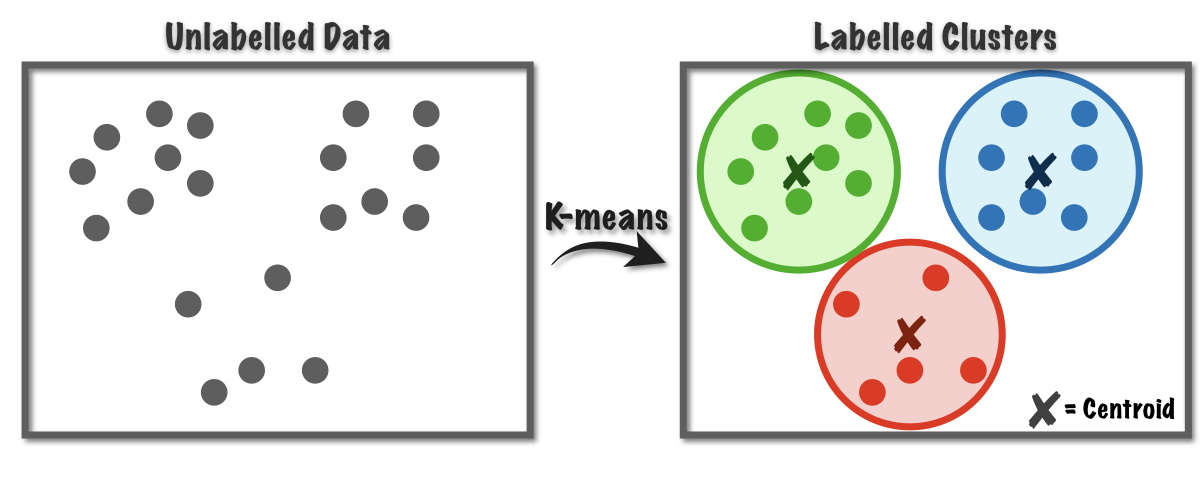

A cluster refers to a collection of data points aggregated together because of certain similarities.
You’ll define a target number k, which refers to the number of centroids you need in the dataset. A centroid is the imaginary or real location representing the center of the cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares. In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid.

To process the learning data, the K-means algorithm starts with a first group of randomly selected centroids, which are used as the beginning points for every cluster, and then performs iterative (repetitive) calculations to optimize the positions of the centroids

It halts creating and optimizing clusters when either:
The centroids have stabilized — there is no change in their values because the clustering has been successful.
The defined number of iterations has been achieved

                                                                                Source: https://towardsdatascience.com/

## Task

The idea of this proyect is to cluster the data coming from the three couentries, Colombia, Taiwan and Guatemala, using  balance vs altitude and balance vs flavor as a x and y elements. To do that, we will find the optimal k value and also we will compare the solution using the 3 obvious cluster (the three countries). 



### Cool coffee fact. Balance

Balance is a difficult term when evaluating quality. When tasting coffees for defects, professional tasters use the term to describe a coffee that does not localize at any one point on the palate; in other words, it is not imbalanced in the direction of some one (often undesirable) taste characteristic. As a term of general evaluation, balance appears to mean that no one quality overwhelms all others, but there is enough complexity in the coffee to arouse interest. It is a term that on occasion damns with faint praise. The Costa Rica sample should be most balanced, although it probably has less idiosyncrasy to balance than the other two coffees. The Kenya should be both complex and balanced; the Sumatra may be imbalanced by overbearing pungent tones and may be a bit rough.

In [35]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

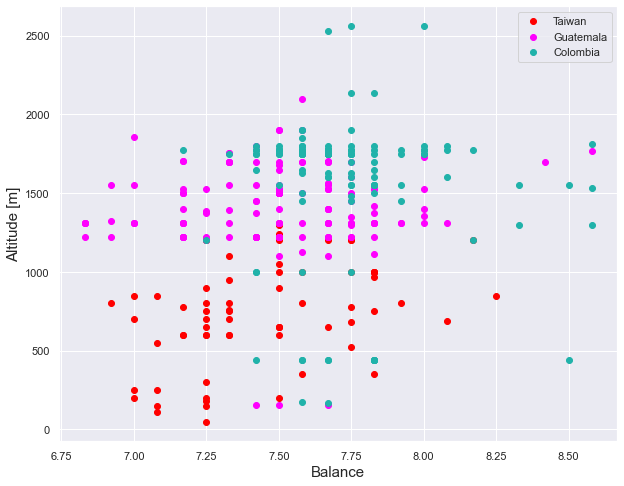

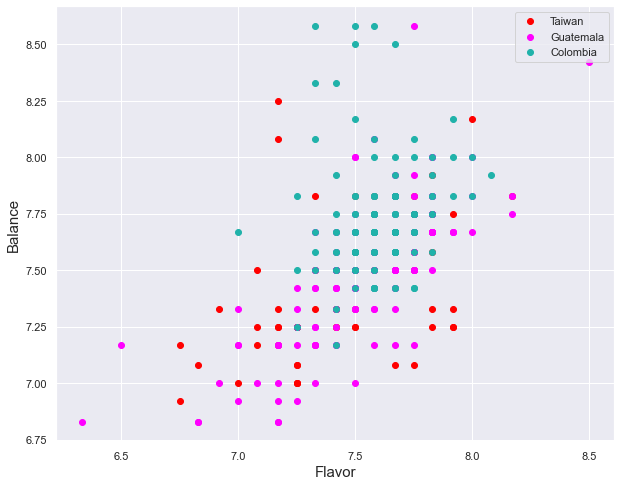

In [42]:
# Set theme for plotting
sns.set_theme()

# Import the data
cafe = pd.read_csv("coffee_data.csv")
cafe.rename(columns = {'Country.of.Origin':'Country', 'Total.Cup.Points':'Total_points'}, inplace = True)

# Plot the data
countries = ["Taiwan", "Guatemala","Colombia"]
colors = ["red", "magenta", "lightseagreen"]

fig, ax1 = plt.subplots(figsize = (10, 8))
for country, color in zip(countries, colors):
    temp_df = cafe[cafe.Country == country]
    ax1.scatter(temp_df.Balance,
               temp_df.altitude_mean_meters,
               c = color,
               label = country, 
               )
    
ax1.set_xlabel("Balance", fontsize = 15)
ax1.set_ylabel("Altitude [m]", fontsize = 15)
ax1.legend()
plt.show()


# Plot the data

fig, ax2 = plt.subplots(figsize = (10, 8))
for country, color in zip(countries, colors):
    temp_df = cafe[cafe.Country == country]
    ax2.scatter(temp_df.Flavor,
               temp_df.Balance,
               c = color,
               label = country, 
               )
    
ax2.set_xlabel("Flavor", fontsize = 15)
ax2.set_ylabel("Balance" , fontsize = 15)
ax2.legend()
plt.show()

Clustering this elements is a dificult task, especially when you uses flaor an balance. We will try cluster the data for this 3 countries, first using the optimal k value and secondly using the 3 groups that reperesent the three countries. 

### Getting the optimal k value

In [36]:
X1 = cafe[['Balance','altitude_mean_meters']].to_numpy()
X2 = cafe[['Flavor','Balance']].to_numpy()
# Inertia measures how well a dataset was clustered by K-Means. 
# It is calculated by measuring the distance between each data point and its centroid, 
# squaring this distance, and summing these squares across one cluster.
wcss1=[]
wcss2=[]

for i in range(1,16):
    km1 = KMeans(i)
    km2 = KMeans(i)
    km1.fit(X1)
    km2.fit(X2)
    wcss1.append(km1.inertia_)
    wcss2.append(km2.inertia_)
    
np.array(wcss1)
np.array(wcss2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


array([196.34650462,  96.37854636,  63.05535206,  50.24716185,
        41.9650567 ,  34.68413447,  30.73621805,  27.04623722,
        24.44609567,  21.99956382,  20.17756971,  18.77736169,
        17.47902661,  16.14161569,  15.02152872])

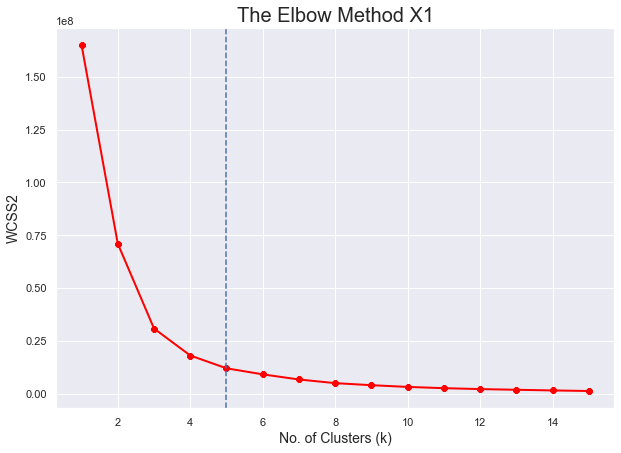

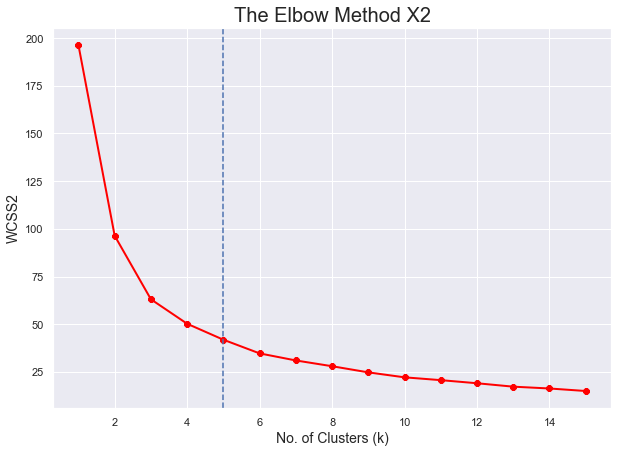

In [6]:
fig, ax1 = plt.subplots(figsize=(10,7))
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
ax1 = plt.plot(range(1,16),wcss1, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS2', fontsize = 14)
plt.xlabel('No. of Clusters (k)', fontsize = 14)
plt.title('The Elbow Method X1', fontsize = 20)
plt.show()
fig, ax2 = plt.subplots(figsize=(10,7))
ax2 = plt.plot(range(1,16),wcss2, linewidth=2, color="red", marker ="8")
plt.axvline(x=5, ls='--')
plt.ylabel('WCSS2', fontsize = 14)
plt.xlabel('No. of Clusters (k)', fontsize = 14)
plt.title('The Elbow Method X2', fontsize = 20)
plt.show()

According to the plot, a k=5 is choosen as the "optimal value". 

### Clustering by altitude and balance

In [58]:
# Kmeans algorithm k=5

algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [59]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

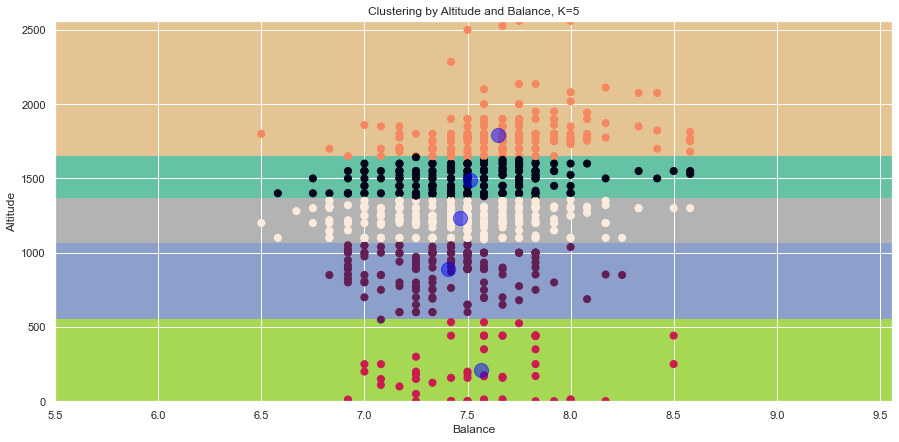

In [63]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, aspect = 'auto', origin='lower')
plt.scatter(cafe.Balance, cafe.altitude_mean_meters, c = labels1, s = 50) 
#plt.scatter(x='altitude_mean_meter', y='Flavor', data = cafe, c = labels1, s = 10)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'blue' , alpha = 0.5)
plt.ylabel('Altitude') , plt.xlabel('Balance')
plt.title("Clustering by Altitude and Balance, K=5")
plt.show()

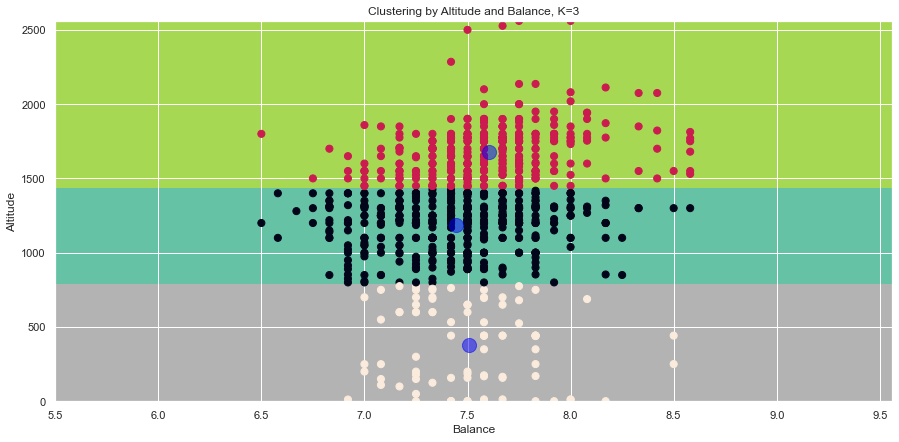

In [52]:
# Kmeans algorithm k=3

algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, aspect = 'auto', origin='lower')
plt.scatter(cafe.Balance, cafe.altitude_mean_meters, c = labels1, s = 50) 
#plt.scatter(x='altitude_mean_meter', y='Flavor', data = cafe, c = labels1, s = 10)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'blue' , alpha = 0.5)
plt.ylabel('Altitude') , plt.xlabel('Balance')
plt.title("Clustering by Altitude and Balance, K=3")
plt.show()

The clusering for k=3 gives an interesting result, considering that it identified the 3 altitude levels of the 3 countries. The case of Colombia and Guatemala is complex because they have similar heights in many coffee samples; however, the algorithm manages to identify heights higher than 1400 meters, more likely as Colombian coffees.

### Clustering by flavor and balance 

In [53]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

In [54]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

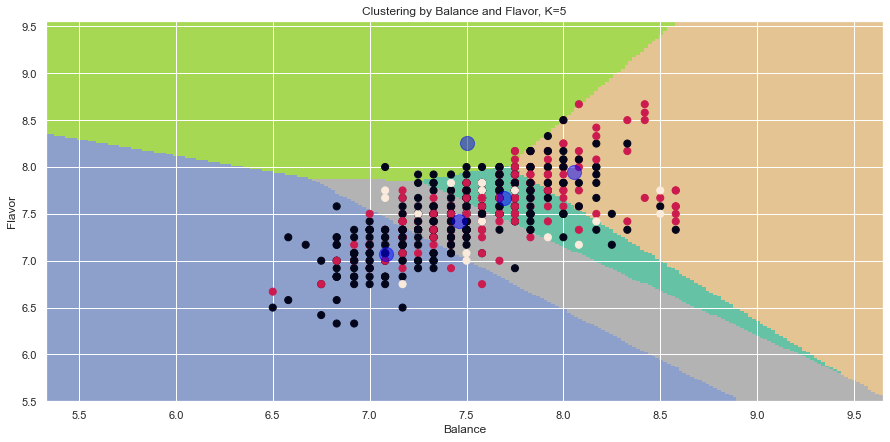

In [56]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, aspect = 'auto', origin='lower')
plt.scatter(cafe.Balance, cafe.Flavor, c = labels1, s = 50) 
#plt.scatter(x='altitude_mean_meter', y='Flavor', data = cafe, c = labels1, s = 10)
plt.scatter(x = centroids[: , 0] , y =  centroids[: , 1] , s = 200 , c = 'blue' , alpha = 0.5)
plt.ylabel('Flavor') , plt.xlabel('Balance')
plt.title("Clustering by Balance and Flavor, K=5")
plt.show()

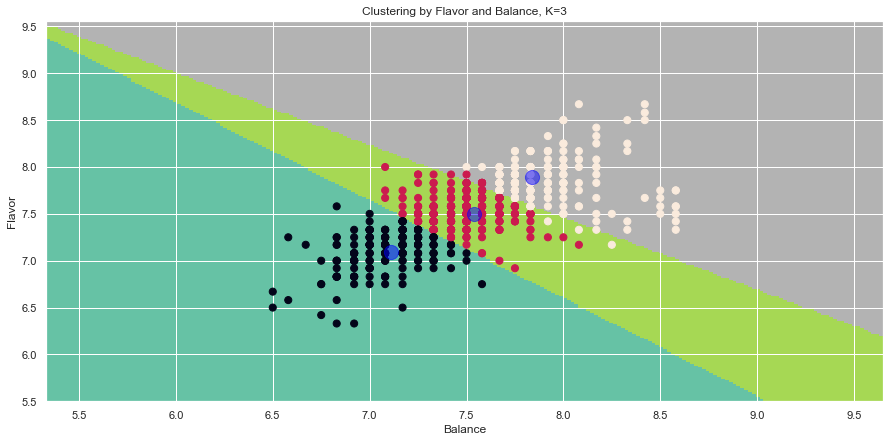

In [65]:
algorithm = (KMeans(n_clusters = 3 ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Set2, aspect = 'auto', origin='lower')
plt.scatter(cafe.Balance, cafe.Flavor, c = labels1, s = 50) 
#plt.scatter(x='altitude_mean_meter', y='Flavor', data = cafe, c = labels1, s = 10)
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 200 , c = 'blue' , alpha = 0.5)
plt.ylabel('Flavor') , plt.xlabel('Balance')
plt.title("Clustering by Flavor and Balance, K=3")
plt.show()

For the case of clustering using balance and flavor, it can be seen that the algorithm finds the three clusters but they are not corelated to the composition by country. This result is expected because there is no clear pattern in the data, and all countries are mixed basically at any point on the graph.